In [1]:
import sys
import math

from PIL import Image

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# https://github.com/rafael-fuente/Python-Raytracer
# https://www.reddit.com/r/madeinpython/comments/i9hgfb/i_finished_my_python_ray_tracer_capable_of/
from sightpy import *

proccesing checkered_floor.png
proccesing stormydays.png
Render Took 6.447444200515747


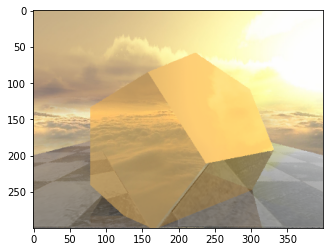

In [2]:
# define materials to use

floor = Glossy(diff_color = image("checkered_floor.png", repeat = 2.),
               roughness = 0.2, spec_coeff = 0.3, diff_coeff = 0.7,
               n = vec3(2.2, 2.2, 2.2)) # n = index of refraction

# n = index of refraction
blue_glass = Refractive(n = vec3(1.5 + 4e-8j, 1.5 +  4e-8j,1.5 +  0.j))
green_glass = Refractive(n = vec3(1.5 + 4e-8j, 1.5 + 0.j,1.5 + 4e-8j))
red_glass = Refractive(n = vec3(1.5 + 0.j,1.5 +  5e-8j,1.5 +  5e-8j))

gold_metal = Glossy(diff_color = rgb(1., .572, .184), n = vec3(0.15+3.58j, 0.4+2.37j, 1.54+1.91j),
                    roughness = 0.0, spec_coeff = 0.2, diff_coeff= 0.8) # n = index of refraction

bluish_metal = Glossy(diff_color = rgb(0.0, 0, 0.1), n = vec3(1.3+1.91j, 1.3+1.91j, 1.4+2.91j),
                      roughness = 0.2,spec_coeff = 0.5, diff_coeff= 0.3)

# Set Scene 

Sc = Scene()
Sc.add_Camera(look_from = vec3(0., 0.25, 1. ), look_at = vec3(0., 0.25, -3.),
              screen_width = 400, screen_height = 300)

Sc.add_DirectionalLight(Ldir = vec3(0.0,0.5, 0.5),  color = rgb(0.5, 0.5, 0.5))

Sc.add(Plane(material = floor,  center = vec3(0, -0.5, -3.0), width = 6.0, height = 6.0,
             u_axis = vec3(1.0, 0, 0), v_axis = vec3(0, 0, -1.0) , max_ray_depth = 5))

cb = Cuboid( material = green_glass, center = vec3(0.00, 0.0001, -0.8), width = 0.9, height = 1.0,
            length = 0.4, shadow = False, max_ray_depth = 5)

cb.rotate(θ = 30, u = vec3(0,1,0))
#Sc.add(cb)

obj = TriangleMesh(file_name = 'dodecahedron.obj',
                   center = vec3(0.00, 0.0001, -0.8), material = gold_metal,
                   shadow = False, max_ray_depth = 5)
obj.rotate(θ = 30, u = vec3(0,1,0))
Sc.add(obj)

#see sightpy/backgrounds
Sc.add_Background("stormydays.png")

# Render 
img = Sc.render(samples_per_pixel = 4)

plt.imshow(img)
plt.show()
